The [pandas](http://pandas.pydata.org) package allows you to handle complex tables of data of different types and time series. Click on the following cell. Then click the 'Run' button to import pandas and check its version.

In [1]:
import pandas as pd
pd.__version__

'2.0.3'

### Task 1: import the wine dataset

###### Importing the dataset, wine.csv, by replacing the question marks ‘???’ in the following cell with the correct file name and the path.

Click [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to see more information on pandas.read_csv

In [2]:
import pandas as pd

data = pd.read_csv("../../mlnc_DATA/wine.csv")

You can use the shape function in pandas to check the dimensionality of the dataset as shown in the following cell.

In [3]:
data.shape

(178, 14)

To get a rough idea of this data file’s content, you can print the first five or the last five rows 
using the commands shown in the following two cells. You can also input an integer (its absolute value should be no more than the total number of rows in the dataset.) in the brackets. More details can be seen in [pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [pandas.DataFrame.tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html).

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


### Task 2: Access the data 

One way to access the data imported from pandas is to use function [iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html). Run the following two cells to see what you get and compare the output with the outputs of data.head() and data.tail(). Note that in Python, the index of an array (or matrix) counts from zero. In the pair of square brackets of iloc in the following cell, the comma separates two parts: the first part is for accessing rows; the second part is for accessing columns. 

In [6]:
first_two_rows = data.iloc[0:2, :]
first_two_rows

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [7]:
first_two_columns = data.iloc[:, 0:2]
first_two_columns

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


Slicing of arrays: getting and setting smaller segments within a larger dataframe.  
To access a slice of a dataframe, you can use [start:stop:step] for each part in the pair of square brackets. The default values are start=0, stop = size of dimension, step=1. For example, as you may have already known, [0:2, :] is used to access elements starting from the first row, stopping at the third row with a step of 1. The second colon sign means to get all columns. 

#### Task 2 a) Replace the question marks ‘???’ in the following cell to get the first 13 columns in the dataframe.

In [24]:
"""Get all features"""
Inputs = data.iloc[:, 0:13]
print(Inputs.shape)

(178, 13)


###### You can also input an integer in each part of the pair of square brackets to get the specific row or the specific column

#### Task 2 b) Replace the question marks ‘???’ in the following cell to get the last column in the dataframe.

In [9]:
#### """Get labels"""
Labels = data.iloc[:,13]
Labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

### Normalising the data - do it for features only
Before doing a PCA analysis, you need to subtract the mean value from each feature. You can do it by applying [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from [sklearn](https://scikit-learn.org/stable/).preprocessing: which not only removes the mean but also scales features to have a unit variance. Run the following cell: the first line is to import StandardScaler; the second line is to normalise the data by using fit_transform.

In [10]:
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(Inputs)

There are two steps in fit_transform(). First, fit() is used to extract the mean value and the standard deviation from each feature. Then transform() is applied to remove the mean and scale the corresponding feature. You can also use fit() and transform() separately.  

### Task 3: Normalise the data using fit() and transform() separately.  Replace the question marks ‘???’ in the following cell.

In [11]:
statistics = StandardScaler().fit(Inputs)
x2 = statistics.transform(Inputs)
print(x2.mean(axis=0)) # print the mean value of each feature after removing the mean
print(x2.std(axis=0)) # print the standard deviation value of each feature after removing the mean

[-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  2.49488320e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Task 4: Do a principal component analysis (PCA). You can do it by applying [PCA from sklearn.decomposition](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Replace the question marks "???" in the following cell.

In [12]:
from sklearn.decomposition import PCA # import PCA

pca = PCA( ) # initialising a PCA instance for all features (empty)
proj_wine = pca.fit_transform(x2) # The eigen-decomposition is done by using the fit() function; projections of the data in the PCA space is obtained using the transform() function. 
print(proj_wine.shape)

(178, 13)


Similarly to StandardScaler(), methods fit() and transform() can also be used separately for PCA(). Run the following cell.

In [13]:
eigen_decom = PCA().fit(x2)
proj_wine = eigen_decom.transform(x2)

It is important to report how much variance has been captured in a PCA analysis. You can obtain the information as shown in the following cell. Run the following cell.

In [14]:
print(pca.explained_variance_)  # Eigen-values sorted in descending order
print(pca.explained_variance_ratio_)  # Ratio / sum of eigen-values-(aka trace)


import numpy as np
pca.explained_variance_[0]/np.sum(pca.explained_variance_)  

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


0.3619884809992637

If we want to keep one decimal only in the results, we can use the round function from [numpy](https://numpy.org/) as shown in the following cell.

In [15]:
import numpy as np

print(np.round(pca.explained_variance_,2)) 
print(np.round(pca.explained_variance_ratio_,2)) 

[4.73 2.51 1.45 0.92 0.86 0.65 0.55 0.35 0.29 0.25 0.23 0.17 0.1 ]
[0.36 0.19 0.11 0.07 0.07 0.05 0.04 0.03 0.02 0.02 0.02 0.01 0.01]


### Task 5: Replace the question marks ‘???’ in the following cell to see how much variance has been captured using the first two principal components. 

In [16]:
var = np.sum(pca.explained_variance_[:2])
print(var)
var_percentage = np.sum(pca.explained_variance_ratio_[:2])*100
print(var_percentage,'%')

7.243517907228727
55.406338356935336 %


### Scree plot: index of principal components against variance (variance percentage)

To produce a plot, you may use [matplotlib.pyplot](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html). To do that, run the following cell to import matplotlib.pyplot.

In [17]:
import matplotlib.pyplot as plt

### Task 6: Replacing the question marks ‘???’ in the following cell to produce a scree plot. 

Text(0, 0.5, 'Explained Variance Ratio')

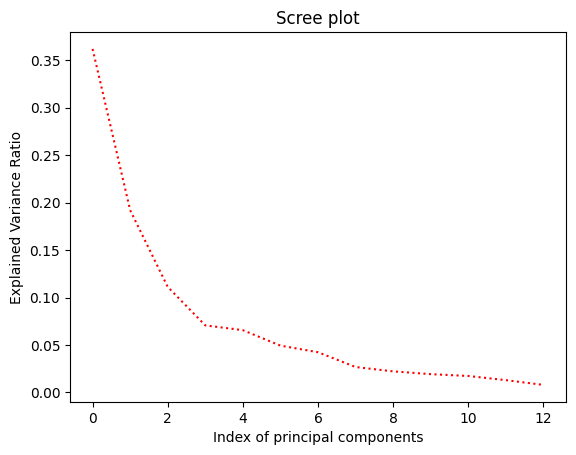

In [18]:
figure = plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_ratio_, color='red', linestyle='dotted')
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("Explained Variance Ratio")

# Elbow point at about PC 7
# Meaning 7 features (7 linear combinations of original features)

### Data Visualisation using PCA

### Task 7: Replace the question marks ‘???’ in the following cell to produce a scatter plot of the first principal component against the second principal component. You can see more details on how to use the scatter function from [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

Text(0, 0.5, 'PC2')

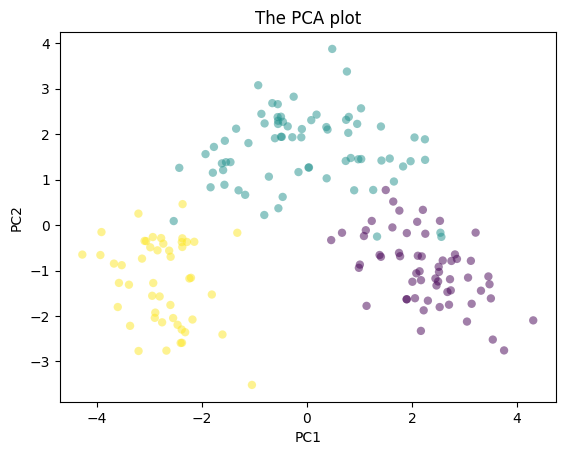

In [19]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(proj_wine[:,0],proj_wine[:,1], c=Labels, edgecolor='none', alpha=0.5)
ax.set_title("The PCA plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

You can put two or more subplots in one figure by using the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function

### Task 8: Replace the question marks ‘???’ in the following cell to produce a figure including two subplots in one row.

Text(313.26767676767673, 0.5, 'The explained variance ratio')

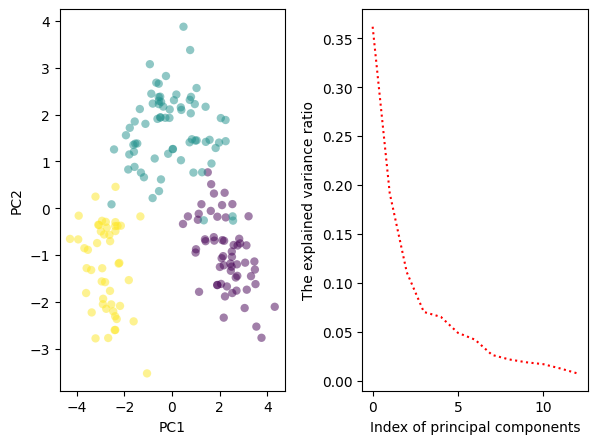

In [20]:
#### import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=2.50) # set subplot spacing

plt.subplot(121)
dots_trn=plt.scatter(proj_wine[:,0],proj_wine[:,1], c=Labels, edgecolor='none', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
classes=['C1', 'C2', 'C3']

"""plt.legend(handles=dots_trn.legend_elements()[0], labels=classes)"""

plt.subplot(122)
plt.plot(pca.explained_variance_ratio_, color='red', linestyle='dotted')
plt.xlabel("Index of principal components")
plt.ylabel("The explained variance ratio")


### Task 9: Save the pca plot to a file 

You can save a figure using the savefig() command. For example, to save the  previous PCA scatter figure you have produced, you can run the code in the following cell.


In [21]:
figure.savefig('pca_wine.png')

A file called pca_wine.png is saved in the current working directory. You may  check if it contains what you think it contains, you can run the code in the following cell.

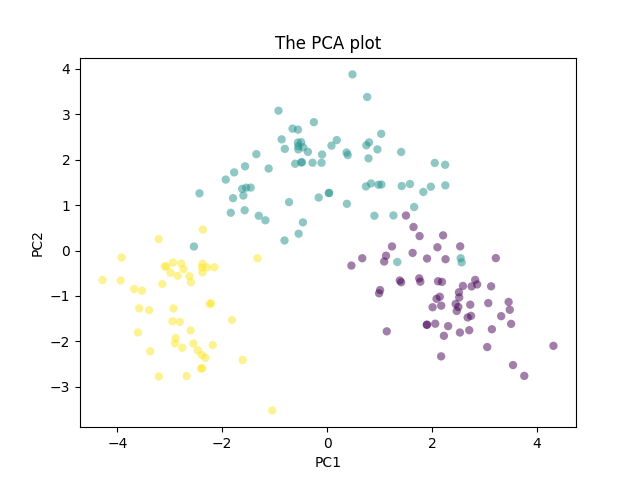

In [22]:
from IPython.display import Image
Image('pca_wine.png')

You can find the list of supported file types for your system by using the code shown in the following cell.

In [23]:
figure.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}